# Compare ARIMA & Linear Regression Approaches

## Generate & Plot Test Data Set

Also do all the necessary imports.

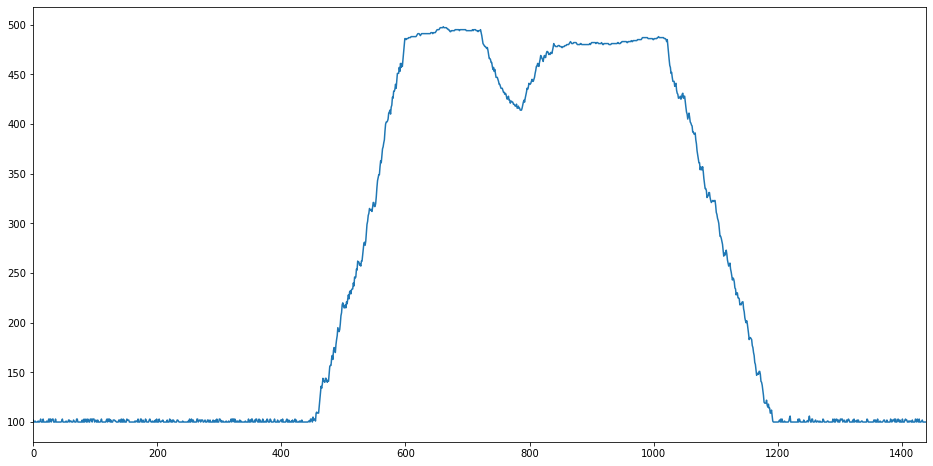

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
import util

%matplotlib inline

mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['axes.grid'] = False

df = util.gen_random_data_frame()

aces = df['Security ACEs']
aces.plot()

## Loop over Data & Predict

 56%|█████▋    | 756/1340 [01:44<01:03,  9.19it/s]/Users/einarnn/.virtualenvs/a/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
100%|██████████| 1340/1340 [02:55<00:00,  7.63it/s]


Test MSE (ARIMA) : 5.418
Test MSE (LR)    : 6.909


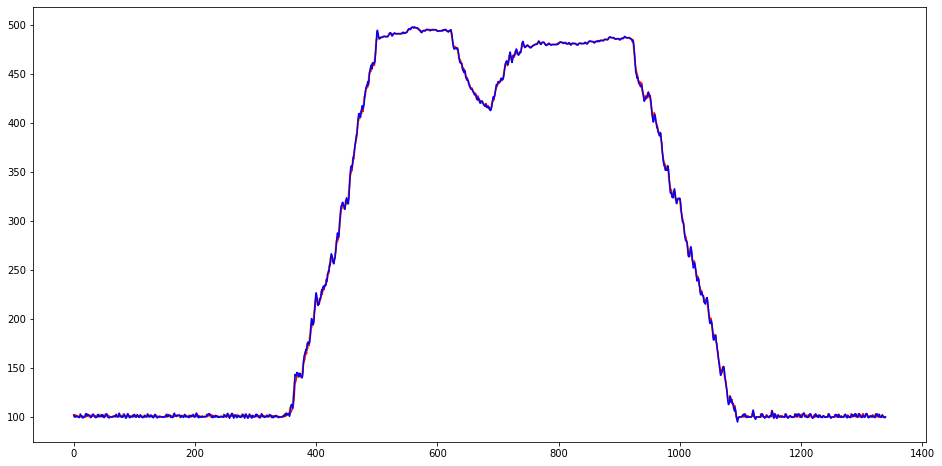

In [2]:
HIST = 100

x = [x for x in range(0, 1440)]
y = aces.values

x_train, x_test = x[:HIST], x[HIST:]
y_train, y_test = y[:HIST], y[HIST:]
history = [h for h in y_train]
predictions_lr = list()
predictions_arima = list()

# can just create a single LR "model"
model_lr = LinearRegression()

# loop over test array now
for t in tqdm(range(len(x_test))):
    
    # do ARIMA model & prediction
    model_arima = ARIMA(history, order=(5, 1, 0))
    model_arima_fit = model_arima.fit(disp=0)
    output = model_arima_fit.forecast()
    yhat_ar = output[0]
    predictions_arima.append(yhat_ar)
    
    # do LR (TODO: this can be more efficient, probably by moving
    # stuff outside the loop!)
    x_arr = np.array(x[x_test[t]-5:x_test[t]]).reshape(-1, 1)
    y_arr = np.array(history[-5:]).reshape(-1, 1)
    model_lr.fit(x_arr, y_arr)
    yhat_lr = model_lr.intercept_ + (model_lr.coef_[0] * x_test[t])
    predictions_lr.append(yhat_lr)
    
    # update history
    obs = y_test[t]
    history.append(obs)


error_arima = mean_squared_error(y_test, predictions_arima)
error_lr = mean_squared_error(y_test, predictions_lr)
print('Test MSE (ARIMA) : %.3f' % error_arima)
print('Test MSE (LR)    : %.3f' % error_lr)

plt.plot(history[HIST:], color='orange')
plt.plot(predictions_arima, color='red')
plt.plot(predictions_lr, color='blue')
plt.show()